In [7]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
baseVendas = pd.read_csv('Mall_Customers.csv')

In [3]:
baseVendas.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
profile = ProfileReport(baseVendas, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_file(output_file='Kmeans_Mall_Costumers_Raw.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

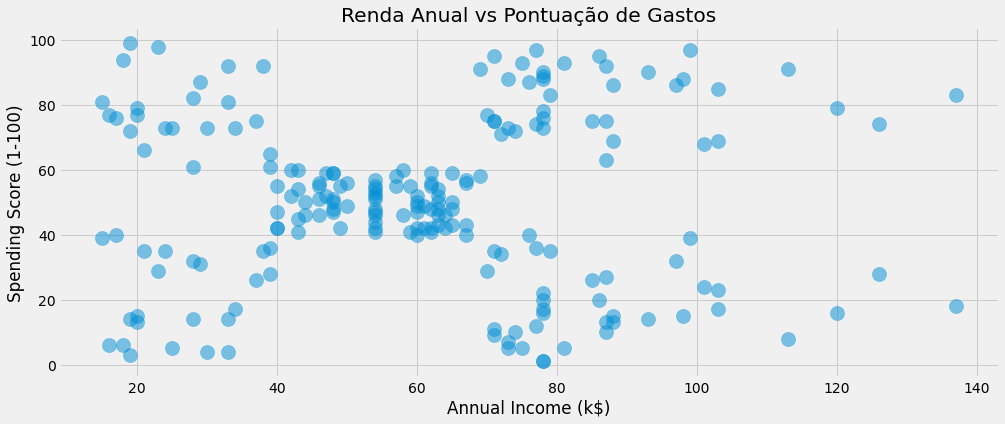

In [12]:
#style verificar referencias sobre os modelos
plt.style.use('fivethirtyeight')
#Tamanho da tela em em proporções
plt.figure(1, figsize=[15,6])
#declarando os eixos x e y dentro da data base com tamanho ampliado "s" e transparencia dos pontos em "alpha"
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=baseVendas, s=200, alpha=0.5)
#titulo do grafico
plt.title('Renda Anual vs Pontuação de Gastos')
#Nome do eixo "x"
plt.xlabel('Annual Income (k$)')
#nome do eixo "y"
plt.ylabel('Spending Score (1-100)')
#Apresentar o grafico
plt.show()

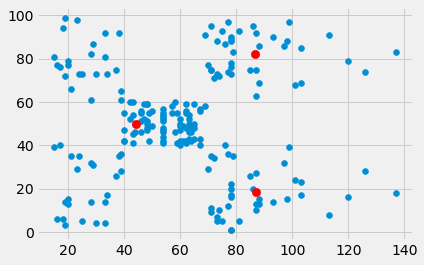

In [17]:
X2 = baseVendas[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

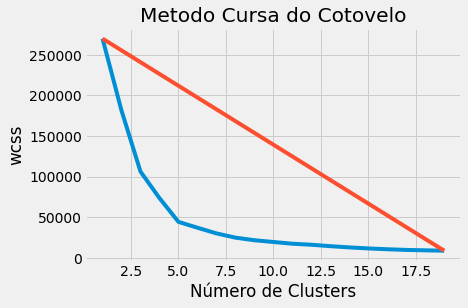

In [18]:
wcss = []
for i in range (1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Metodo Cursa do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('wcss')
plt.show()

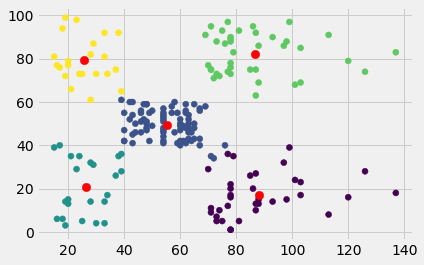

In [22]:
# Garantia que as bases com nome em string vão ser reconhecidas pelo KMeans atrás do iloc
X2 = baseVendas[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1], c = pred_y)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]
    
44448.45544793371


<function matplotlib.pyplot.show(close=None, block=None)>

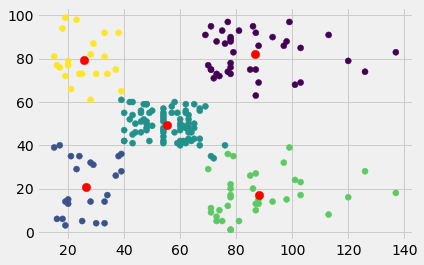

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

print(kmeans.cluster_centers_)
print("    ")
print(kmeans.inertia_)

plt.scatter(X2[:,0], X2[:,1], c = pred_y)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show